# Baseline

L'objectif de ce notebook est de créer la baseline du projet 7.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import os

# Chargement des données

Comme la baseline  ne demande pas beaucoup de temps de calcul, on peut utiliser toutes les données à notre disposition.

In [2]:
train_dir = "data_train/unencode"
test_dir = "data_test/unencode"

train = []
test = []

In [3]:
for filename in os.listdir(train_dir):
    f = os.path.join(train_dir, filename)
    train.append(pd.read_csv(f))

for filename in os.listdir(test_dir):
    f = os.path.join(test_dir, filename)
    test.append(pd.read_csv(f))

print("train: ", len(train)," protéines")
print("test: ", len(test)," protéines")

train:  18231  protéines
test:  4613  protéines


# Modélisation

L'idée de la baseline est d'attibuer une probabilité d'avoir une hélice au niveau d'un acide aminé donné égale à la proportion de cet acide aminé, dans le jeu d'entraînement, présentant une hélice.

In [4]:
class Baseline:
    proba = {}
    def __init__(self):
        pass
    
    def fit(self, X_train):
        df = pd.concat(X_train).reset_index(drop=True)
        df = df.groupby(['acids'])
        df = df.agg({'acids':'count' ,'helix':'sum'})
        df['proba_helix'] = (df['helix']/df['acids']).apply(lambda x: round(x, 3))
        self.proba = {acids: df['proba_helix'].loc[acids] for acids in df.index}
        
    def get_proba(self):
        return self.proba
    
    def predict(self, Y):
        pred = [y['acids'].apply(lambda x: self.proba[x]) for y in Y]
        return pred

### Entraînement

In [5]:
model = Baseline()

In [6]:
model.fit(X_train=train)

In [7]:
dic = model.get_proba()
dic

{'ALA': 0.486,
 'ARG': 0.435,
 'ASN': 0.387,
 'ASP': 0.413,
 'CYS': 0.395,
 'GLN': 0.469,
 'GLU': 0.475,
 'GLY': 0.31,
 'HIS': 0.374,
 'ILE': 0.432,
 'LEU': 0.48,
 'LYS': 0.437,
 'MET': 0.481,
 'MSE': 0.531,
 'PHE': 0.426,
 'PRO': 0.306,
 'SER': 0.383,
 'THR': 0.38,
 'TRP': 0.437,
 'TYR': 0.412,
 'VAL': 0.378}

### Test

In [8]:
pred = model.predict(Y=test)

In [9]:
pred[0]

0      0.481
1      0.306
2      0.306
3      0.412
4      0.380
       ...  
205    0.310
206    0.387
207    0.310
208    0.437
209    0.469
Name: acids, Length: 210, dtype: float64

In [10]:
def get_rmse(pred, test, n=None):
    if n is not None:
        a = pred[n].values
        b = test[n]['helix'].values
        rmse = metrics.mean_squared_error(a, b, squared=False)
        return rmse
    else:
        m = len(pred)
        liste_rmse = [get_rmse(pred, test, i) for i in range(m)]
        rmse = sum(liste_rmse) / m
        return rmse
    
def get_mae(pred, test, n=None):
    if n is not None:
        a = pred[n].values
        b = test[n]['helix'].values
        mae = metrics.mean_absolute_error(a, b)
        return mae
    else:
        m = len(pred)
        liste_mae = [get_mae(pred, test, i) for i in range(m)]
        mae = sum(liste_mae) / m
        return mae

In [11]:
get_rmse(pred, test)

0.48557059509806766

In [12]:
get_mae(pred, test)

0.4770668534579994

Notre réseau de neurone devra faire mieux que ces valeurs.

### Représentation graphique de quelques prédictions

In [13]:
def plot_result(pred, test, n):
    if n < len(test) and n >= 0:
        plt.figure(figsize=(15, 7))
        plt.plot(pred[n].index, pred[n].values)
        plt.plot(pred[n].index, test[n]['helix'].values, color='orange')
        plt.legend(['proba_pred', 'true'], loc="upper right")
        plt.xlabel('Position dans la séquence d\'acides aminés')
        plt.ylabel('probabilité d\'avoir une hélice')
        plt.title('Comparaison entre prédiction et réalité pour la protéine {0} de test'.format(n))
    else:
        print("error: ", n, "out of bound")

In [14]:
get_rmse(pred, test, 0)

0.5207989421026488

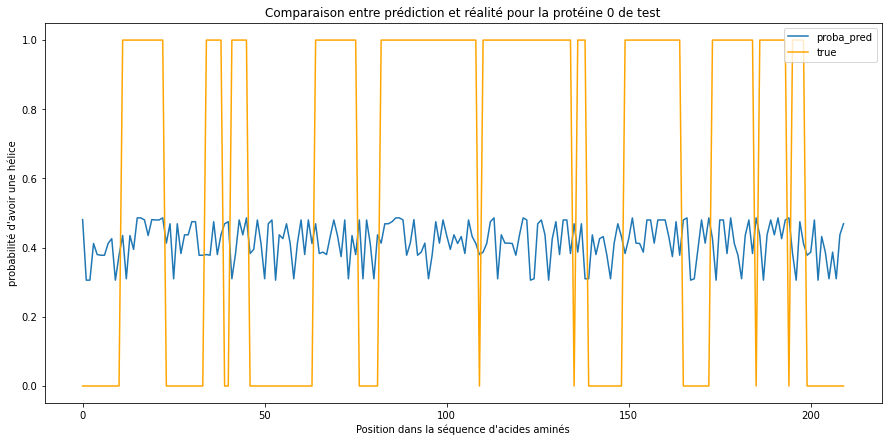

In [15]:
plot_result(pred, test, 0)

In [16]:
get_rmse(pred, test, 1)

0.47557060210904695

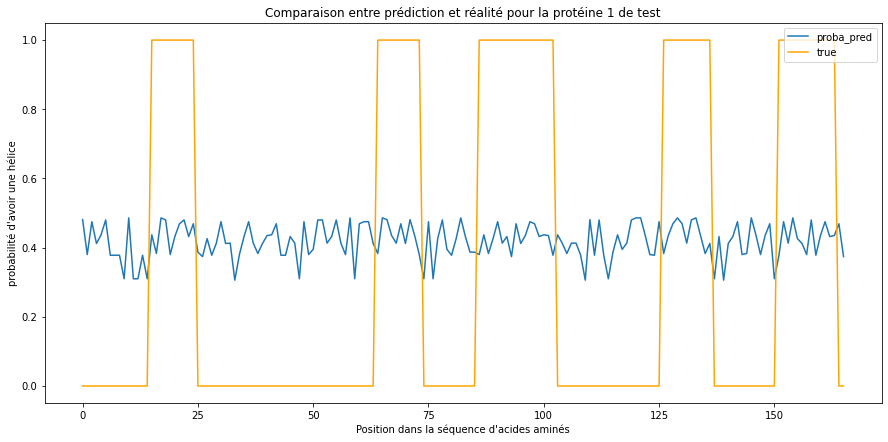

In [17]:
plot_result(pred, test, 1)